In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414


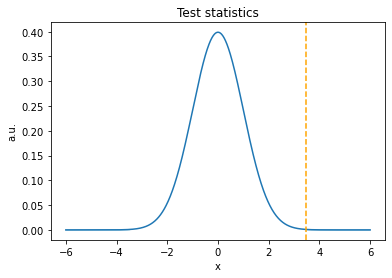

In [48]:
mu0 = 6.3  # mean of the Poisson distribution
x0 = 15  # value of our measurement

# computation of the Z score
Z = abs(x0 - mu0) / np.sqrt(mu0)
print("Z =", Z)

# We assume that the test statistic has a normal distribution
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs) # only generating random points
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

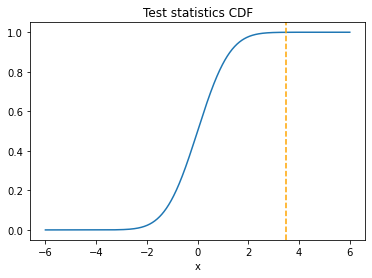

p-value = 0.00026397158691493505
alpha = 0.0015


In [49]:
# plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

# calculate the p-value as the integral of the right tail
pvalue = 1. - stats.norm.cdf(Z)
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)
print("alpha = 0.0015")
print('As p-value < alpha we reject the null hypotesis')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [50]:
# Computation of the test statistic
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

mean_pre = np.mean(pre) # means of the two samples
mean_post = np.mean(post)

var_pre = np.var(pre, ddof=1) # estimated variance of the two samples
var_post = np.var(post, ddof=1)

sigma = np.sqrt((var_pre + var_post)/2) # sigma used to calculate T

T = (mean_pre - mean_post)/(sigma*np.sqrt(2/n)) # test statistic

print("The value of the test statistic is: T =", T)

The value of the test statistic is: T = -3.786997938137629


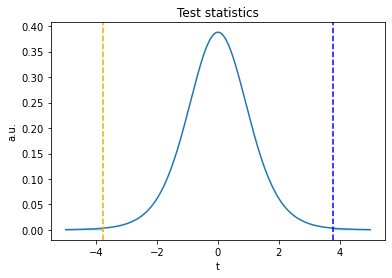

p-value = 0.004302464132864604
The p-value is p < α = 0.01, therefore we reject the null hypotesis: the change in blood pressure is not significant.


In [51]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("The p-value is p < \u03B1 = 0.01, therefore we reject the null hypotesis: the change in blood pressure is not significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Text(0.5, 1.0, 'Temperature in Alaska')

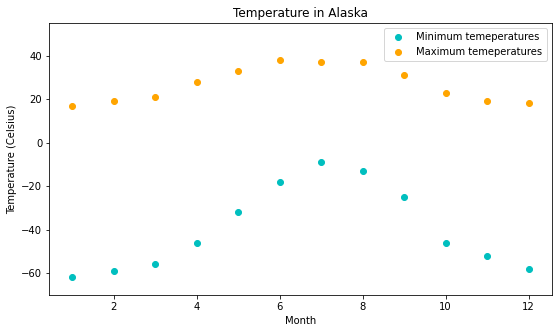

In [52]:
Tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
month = np.arange(1, 13, 1)

#Temperatures plot
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(month, Tmin, 'o', color='c', label='Minimum temeperatures')
ax.plot(month, Tmax, 'o', color='orange', label='Maximum temeperatures')
ax.legend(loc='best')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (Celsius)')
ax.set_ylim(bottom=-70, top=55)
ax.set_title("Temperature in Alaska")

In [53]:
from scipy import optimize

# definition of the fit function: I suppose it is an oscillating function with a period of 12 months
def f(x, a, omega, x0, b):  
    return a * np.sin(omega * (x + x0)  ) + b # sine function with amplitude a angular frequency omega (2pi/T) and offset b 

# fit using curve_fit where p0 is a guess for the parameters
popt_min, pcov_min = optimize.curve_fit(f, month, Tmin, p0=[30, 3.14/6, 1, -30], full_output=False)
popt_max, pcov_max = optimize.curve_fit(f, month, Tmax, p0=[10, 3.14/6, 1, 30], full_output=False)

print("parameters (minimum temperature):\n", popt_min)
print("covariance matrix (minimum temperature):\n", pcov_min)
print()
print("parameters (maximum temperature):\n", popt_max)
print("covariance (maximum temperature):\n", pcov_max)
print()
print('Parameters with errors for the evolution of the minimum temperatures')
print("a_min = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("omega_min = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("x0_min = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))
print("b_min = %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3])))
print()
print('Parameters with errors for the evolution of the maximum temperatures')
print("a_max = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("omega_max = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("x0_max = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))
print("b_max = %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3])))

parameters (minimum temperature):
 [-25.1496201    0.60132086   0.70373461 -36.71256712]
covariance matrix (minimum temperature):
 [[ 1.72807273e+00  2.48119341e-04  5.80439892e-03 -1.89191452e-01]
 [ 2.48119341e-04  5.30714818e-04 -6.54075469e-03  1.60002778e-02]
 [ 5.80439892e-03 -6.54075469e-03  8.93964155e-02 -1.91990421e-01]
 [-1.89191452e-01  1.60002778e-02 -1.91990421e-01  1.41859840e+00]]

parameters (maximum temperature):
 [-10.58169952   0.59227425   1.23365587  27.94963548]
covariance (maximum temperature):
 [[ 0.16816409  0.00085879 -0.01061419 -0.00655406]
 [ 0.00085879  0.00044871 -0.00593676  0.00640262]
 [-0.01061419 -0.00593676  0.08367007 -0.08431238]
 [-0.00655406  0.00640262 -0.08431238  0.18339505]]

Parameters with errors for the evolution of the minimum temperatures
a_min = -25.15 +- 1.31
omega_min = 0.60 +- 0.02
x0_min = 0.70 +- 0.30
b_min = -36.71 +- 1.19

Parameters with errors for the evolution of the maximum temperatures
a_max = -10.58 +- 0.41
omega_max = 0.

Text(0.5, 1.0, 'Fit of temperature in Alaska')

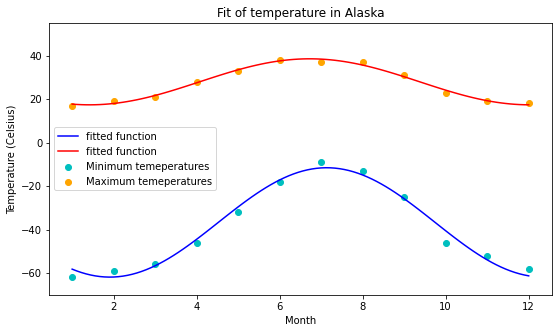

In [54]:
x = np.linspace(1, 12, num=100)  # defining the x point to plot the fit function

#Temperatures plot
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(month, Tmin, color='c', label='Minimum temeperatures')
ax.scatter(month, Tmax, color='orange', label='Maximum temeperatures')
ax.plot(x, f(x, popt_min[0], popt_min[1], popt_min[2], popt_min[3]), color='blue', label='fitted function')
ax.plot(x, f(x, popt_max[0], popt_max[1], popt_max[2], popt_max[3]), color='red', label='fitted function')
ax.legend(loc='best')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (Celsius)')
ax.set_ylim(bottom=-70, top=55)
ax.set_title("Fit of temperature in Alaska")

In [55]:
print('The time offset for min and max temperatures is the same as the two values corresponding to x0_min and x0_max are the compatible within the errorbars')

The time offset for min and max temperatures is the same as the two values corresponding to x0_min and x0_max are the compatible within the errorbars


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [56]:
import seaborn as sns
import pickle

with open('residuals_261.pkl', 'rb') as inputfile:
    infile = pickle.load(inputfile)

diction = infile.flatten()[0]
datas = pd.DataFrame.from_dict(diction)

clean_datas = datas.query('abs(residuals)<2') # I consider only the data in the range (-2, 2) to better visualize and fit the distribution

clean_datas

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


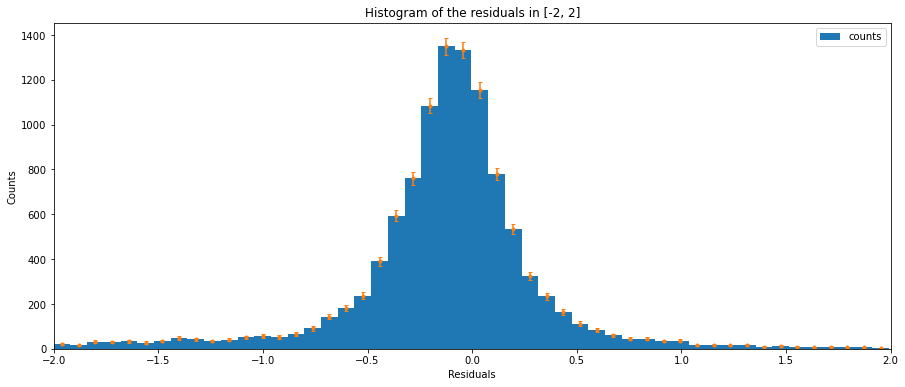

In [62]:
#plot of the histogram and computation of the uncertainty

fig, ax = plt.subplots(figsize=(15, 6))
nbin = 50

#Histogram with all the points from the column 'residuals'
bin_counts, bin_edges, _ = ax.hist(clean_datas['residuals'], bins=nbin, label='counts')
bin_error = np.sqrt(bin_counts) # to get the uncertainity in each bin  
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2  # to compute the bins centers

ax.errorbar(x=bin_centres, y=bin_counts, yerr=bin_error, fmt='.', capsize=2)
ax.set_xlim(-2, 2)
ax.set_title('Histogram of the residuals in [-2, 2]')
ax.set_xlabel('Residuals')
ax.set_ylabel('Counts')
ax.legend(loc='best')

In [66]:
from scipy import optimize
from scipy import stats

# Definition of a normal distribution 
def dist1(x, A, mu, sigma):
    #return A/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mu)/sigma)**2)
    return A*stats.norm.pdf(x, loc=mu, scale=sigma)

# Definition of a Cauchy distribution
def dist2(x, B, x0, gamma):
    return B*stats.cauchy.pdf(x, loc=x0, scale=gamma)

popt_n, pcov_n = optimize.curve_fit(dist1, bin_centres, bin_counts, p0=[500, 0, 0.2], full_output=False) #estimated parameters for the normal distribution
popt_c, pcov_c = optimize.curve_fit(dist2, bin_centres, bin_counts, p0=[200, 0, 0.2], full_output=False) #estimated parameters for the Cauchy distribution

print('Results obtained using the normal distribution')
print()
print("parameters:\n", popt_n)
print("covariance matrix:\n", pcov_n)
print()

print('Fitted parameters with errors:')
print("A = %.2f +- %.2f" % (popt_n[0], np.sqrt(pcov_n[0,0])))
print("mu = %.2f +- %.2f" % (popt_n[1], np.sqrt(pcov_n[1,1])))
print("sigma = %.2f +- %.2f" % (popt_n[2], np.sqrt(pcov_n[2,2])))
print()

print('Results obtained using the cauchy distribution')
print()
print("parameters:\n", popt_c)
print("covariance matrix:\n", pcov_c)
print()

print('Fitted parameters with errors:')
print("A = %.2f +- %.2f" % (popt_c[0], np.sqrt(pcov_c[0,0])))
print("mu = %.2f +- %.2f" % (popt_c[1], np.sqrt(pcov_c[1,1])))
print("sigma = %.2f +- %.2f" % (popt_c[2], np.sqrt(pcov_c[2,2])))



Results obtained using the normal distribution

parameters:
 [ 7.30317573e+02 -8.55852238e-02  2.26408895e-01]
covariance matrix:
 [[ 2.47686151e+02 -9.92264543e-10  5.11911393e-02]
 [-9.92264543e-10  3.17401593e-05 -3.95576326e-13]
 [ 5.11911393e-02 -3.95576326e-13  3.17401602e-05]]

Fitted parameters with errors:
A = 730.32 +- 15.74
mu = -0.09 +- 0.01
sigma = 0.23 +- 0.01

Results obtained using the cauchy distribution

parameters:
 [ 9.41504971e+02 -8.29332307e-02  2.10111890e-01]
covariance matrix:
 [[ 1.74635344e+02 -1.61949074e-06  3.90544738e-02]
 [-1.61949074e-06  8.66098223e-06 -4.99719194e-10]
 [ 3.90544738e-02 -4.99719194e-10  1.74064464e-05]]

Fitted parameters with errors:
A = 941.50 +- 13.21
mu = -0.08 +- 0.00
sigma = 0.21 +- 0.00


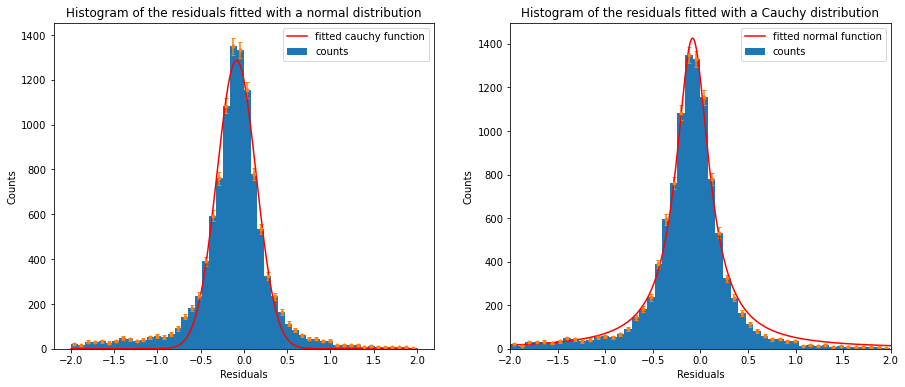

In [69]:
x = np.linspace(-2, 2, num=10000)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Histogram in the range [-2, 2] fitted with a normal distribution
bin_counts, bin_edges, _ = ax1.hist(clean_datas['residuals'], bins=nbin, label='counts')

ax1.errorbar(x=bin_centres, y=bin_counts, yerr=bin_error, fmt='.', capsize=2)
ax1.set_title('Histogram of the residuals fitted with a normal distribution')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Counts')

ax1.plot(x, dist1(x, popt_n[0], popt_n[1], popt_n[2]), color='red', label='fitted cauchy function')
ax1.legend(loc='best')


#Histogram in the range [-2, 2] fitted with a Cauchy distribution
ax2.hist(clean_datas['residuals'], bins=nbin, label='counts')
ax2.errorbar(x=bin_centres, y=bin_counts, yerr=bin_error, fmt='.', capsize=2)
ax2.set_xlim(-2, 2)
ax2.set_title('Histogram of the residuals fitted with a Cauchy distribution')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Counts')

ax2.plot(x, dist2(x, popt_c[0], popt_c[1], popt_c[2]), color='red', label='fitted normal function')
ax2.legend(loc='best')

1298.6628120670846
2353.643184615585
For the normal distribution: p-value = 0.0 and chi2= 1298.6628120670846
For the cauchy distribution: p-value = 0.0 and chi2= 2353.643184615585


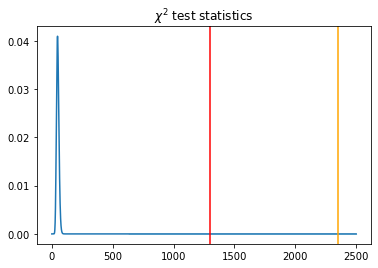

In [75]:
#chi^2 test to define the goodness of the fit

chi2_n = np.sum( ((bin_counts - dist1(bin_centres, popt_n[0], popt_n[1], popt_n[2]))**2) / bin_error**2)
chi2_c = np.sum( ((bin_counts - dist1(bin_centres, popt_c[0], popt_c[1], popt_c[2]))**2) / bin_error**2)

print(chi2_n)
print(chi2_c)

p = np.linspace(0,2500, num=3000)
ts = stats.chi2.pdf(p, df=nbin-1)
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics")
plt.axvline(chi2_n, color='red')
plt.axvline(chi2_c, color='orange')
plt.fill_between(p, ts, where=(p > chi2), color='lightblue')

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue_n = 1. - stats.chi2.cdf(chi2_n, nbin)
pvalue_c = 1. - stats.chi2.cdf(chi2_c, nbin)
print("For the normal distribution: p-value =", pvalue_n, 'and chi2=', chi2_n) 
print("For the cauchy distribution: p-value =", pvalue_c, 'and chi2=', chi2_c) 

In [76]:
print('Both distributions have problems in fitting the tails of the histogram')

Both distributions have problems in fitting the tails of the histogram


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [77]:
file_name = "munich_temperatures_average_with_bad_data.txt"

data = np.loadtxt(file_name)
display(data)

print(data.shape)

array([[ 1.99500274e+03,  9.44444000e-01],
       [ 1.99500548e+03, -1.61111000e+00],
       [ 1.99500821e+03, -3.55556000e+00],
       ...,
       [ 2.01327926e+03,  1.05556000e+01],
       [ 2.01328200e+03,  8.94444000e+00],
       [ 2.01328474e+03,  1.11667000e+01]])

(6679, 2)


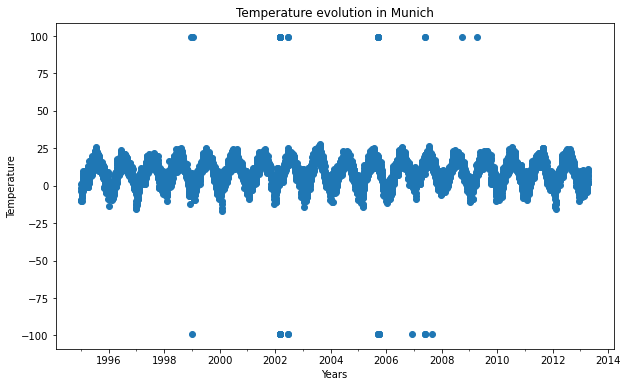

In [78]:
#Plot of the data to understand their distribution

from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(10, 6))
 
ax.scatter(data[:,0], data[:,1])
ax.set_title('Temperature evolution in Munich')
ax.set_xlabel('Years')
ax.set_ylabel('Temperature')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))

In [79]:
# Fit of the data with the first test function f(x)

def f1(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

popt1, pcov1 = optimize.curve_fit(f1, data[:,0], data[:,1], p0=[25, 0, 0], full_output=False)

print("parameters:\n", popt1)
print("covariance matrix:\n", pcov1)
print()

print('Fitted parameters with errors:')
print("a = %.2f +- %.2f" % (popt1[0], np.sqrt(pcov1[0,0])))
print("b = %.2f +- %.2f" % (popt1[1], np.sqrt(pcov1[1,1])))
print("c = %.2f +- %.2f" % (popt1[2], np.sqrt(pcov1[2,2])))


parameters:
 [-9.6712767  -0.22365326  9.0525621 ]
covariance matrix:
 [[ 3.10357106e-02 -3.05722130e-05 -3.52644824e-04]
 [-3.05722130e-05  3.34213295e-04 -2.60864644e-05]
 [-3.52644824e-04 -2.60864644e-05  1.55751792e-02]]

Fitted parameters with errors:
a = -9.67 +- 0.18
b = -0.22 +- 0.02
c = 9.05 +- 0.12


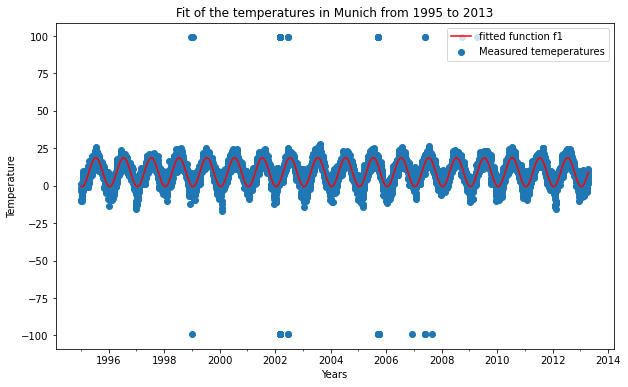

In [80]:
#Fit of all the data with the function f1

x = np.linspace(data[0,0], data[-1,0], num=500)  # defining the x point to plot the fit function

#Temperatures plot
fig, ax = plt.subplots(figsize=(10, 6))
 
ax.scatter(data[:,0], data[:,1], label='Measured temeperatures')
ax.plot(x, f1(x, popt1[0], popt1[1], popt1[2]), color='red', label='fitted function f1')

ax.set_title('Fit of the temperatures in Munich from 1995 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Temperature')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend(loc='upper right')

parameters:
 [-9.98813369 -0.2333476   9.38411487]
covariance matrix:
 [[ 3.22599216e-02 -1.58550979e-07 -5.53237306e-08]
 [-1.58550979e-07  3.23240714e-04 -2.22749792e-08]
 [-5.53237306e-08 -2.22749792e-08  1.61303440e-02]]

Fitted parameters with errors:
a = -9.99 +- 0.18
b = -0.23 +- 0.02
c = 9.38 +- 0.13


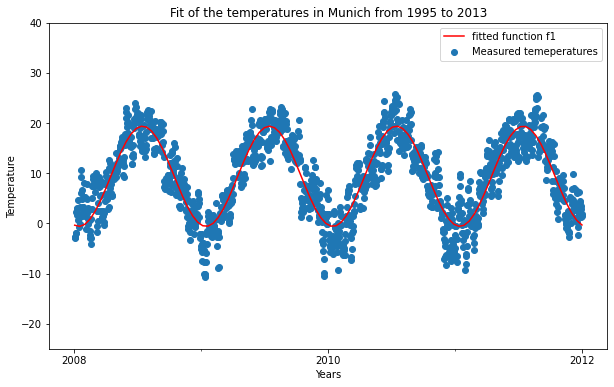

In [81]:
#Fit of the data with the function f1 from 2008 to 2012

data_interval = data[data[:,0]>2008]
data_interval = data_interval[data_interval[:,0]<2012]


# Fit of the first test function

def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

popt1, pcov1 = optimize.curve_fit(f, data_interval[:,0], data_interval[:,1], p0=[25, 0, 0], full_output=False)

print("parameters:\n", popt1)
print("covariance matrix:\n", pcov1)
print()

print('Fitted parameters with errors:')
print("a = %.2f +- %.2f" % (popt1[0], np.sqrt(pcov1[0,0])))
print("b = %.2f +- %.2f" % (popt1[1], np.sqrt(pcov1[1,1])))
print("c = %.2f +- %.2f" % (popt1[2], np.sqrt(pcov1[2,2])))


#Fit of all the data with the function f1

x = np.linspace(data_interval[0,0], data_interval[-1,0], num=100)  # defining the x point to plot the fit function

#Temperatures plot
fig, ax = plt.subplots(figsize=(10, 6))
 
ax.scatter(data_interval[:,0], data_interval[:,1], label='Measured temeperatures')
ax.plot(x, f(x, popt1[0], popt1[1], popt1[2]), color='red', label='fitted function f1')

ax.set_title('Fit of the temperatures in Munich from 1995 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Temperature')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylim(-25, 40)
ax.legend(loc='upper right')

In [82]:
# Overall avarage temperature in Munich

overall_mean = np.mean(data_interval[:, 1])

print('The overall temperature mean in Munich is:', overall_mean)

The overall temperature mean in Munich is: 9.384097734976043


In [83]:
# Fit of the data with the second test function g(x)

def g(t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d

#popt_g, pcov_g = optimize.curve_fit(g, data_interval[:,0], data_interval[:,1], p0=[10, 1, 0.1, 0], full_output=False)
popt_g, pcov_g = optimize.curve_fit(g, data_interval[:,0], data_interval[:,1], p0=[10, 1, 0.2, 0], full_output=False)

print("parameters:\n", popt_g)
print("covariance matrix:\n", pcov_g)
print()

print('Fitted parameters with errors:')
print("a = %.2f +- %.2f" % (popt_g[0], np.sqrt(pcov_g[0,0])))
print("b = %.2f +- %.2f" % (popt_g[1], np.sqrt(pcov_g[1,1])))
print("c = %.2f +- %.2f" % (popt_g[2], np.sqrt(pcov_g[2,2])))
print("d = %.2f +- %.2f" % (popt_g[3], np.sqrt(pcov_g[3,3])))

parameters:
 [ -9.9822025    1.00144387 -18.46875412   9.39812313]
covariance matrix:
 [[ 3.25938912e-02 -4.83559006e-05  6.10709319e-01 -5.13380769e-04]
 [-4.83559008e-05  6.49675700e-06 -8.20503289e-02  6.28917410e-05]
 [ 6.10709321e-01 -8.20503289e-02  1.03624910e+03 -7.94285709e-01]
 [-5.13380770e-04  6.28917410e-05 -7.94285709e-01  1.67469855e-02]]

Fitted parameters with errors:
a = -9.98 +- 0.18
b = 1.00 +- 0.00
c = -18.47 +- 32.19
d = 9.40 +- 0.13


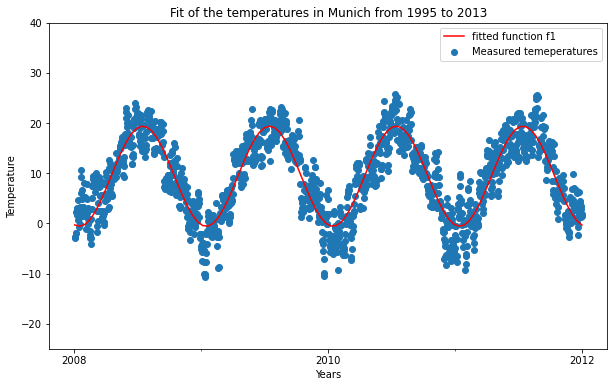

In [84]:
#Fit of all the data with the function g

x = np.linspace(data_interval[0,0], data_interval[-1,0], num=100)  # defining the x point to plot the fit function

#Temperatures plot
fig, ax = plt.subplots(figsize=(10, 6))
 
ax.scatter(data_interval[:,0], data_interval[:,1], label='Measured temeperatures')
ax.plot(x, g(x, popt_g[0], popt_g[1], popt_g[2], popt_g[3]), color='red', label='fitted function f1')

ax.set_title('Fit of the temperatures in Munich from 1995 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Temperature')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylim(-25, 40)
ax.legend(loc='upper right')

In [88]:
#SSR fo the two functions

SSR_f = np.sum((data_interval[:,1] - f1(data_interval[:,0], popt1[0], popt1[1], popt1[2]))**2)
SSR_g = np.sum((data_interval[:,1] - g(data_interval[:,0], popt_g[0], popt_g[1], popt_g[2], popt_g[3]))**2)
print('The SSR for the function f is:', SSR_f)   
print('The SSR for the function g is:', SSR_g)  

The SSR for the function f is: 34359.85859996652
The SSR for the function g is: 34352.79405395927


In [94]:
# Fisher statistic
F = ((SSR_f - SSR_g)/(3-4)) / (SSR_g/(7-4))
print('F=', np.abs(F))

# calculate the p-value from the cdf of the Fisher distribution
pvalue = 1. - stats.f.cdf(F, 3, 4)
print("For the normal distribution: p-value =", pvalue) 
print('A function with more parameters is not needed')

F= 0.0006169407352565559
For the normal distribution: p-value = 1.0
A function with more parameters is not needed
